In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load/read dataset(Collection of Data)
df = pd.read_excel("Hospital Readmission Data.xlsx")
df

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,Male,Emergency,Heart Failure,7,Medication A,Yes,Yes
1,2,50,Female,Elective,Hip Replacement,5,Surgery,Yes,No
2,3,72,Male,Emergency,Pneumonia,10,Antibiotics,No,Yes
3,4,45,Female,Urgent,Appendicitis,3,Surgery,Yes,No
4,5,80,Female,Emergency,Stroke,12,Rehabilitation,Yes,Yes
5,6,60,Male,Elective,Knee Replacement,6,Surgery,No,No
6,7,55,Male,Urgent,Diabetes,4,Insulin,Yes,No
7,8,67,Female,Emergency,COPD,8,Medication B,Yes,Yes
8,9,30,Male,Elective,Tonsillectomy,2,Surgery,No,No
9,10,77,Female,Emergency,Fracture,9,Cast,Yes,Yes


# Basic operation on a data frame

In [3]:
# check of dataset dimensionality
df.shape

(10, 9)

In [4]:
# Check information of a data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PatientID               10 non-null     int64 
 1   Age (in years)          10 non-null     int64 
 2   Gender                  10 non-null     object
 3   AdmissionType           10 non-null     object
 4   Diagnosis               10 non-null     object
 5   LengthOfStay (in days)  10 non-null     int64 
 6   TreatmentReceived       10 non-null     object
 7   FollowUpSchedule        10 non-null     object
 8   Readmitted              10 non-null     object
dtypes: int64(3), object(6)
memory usage: 852.0+ bytes


In [5]:
# To Check null values in numerical
df.isnull().sum()

PatientID                 0
Age (in years)            0
Gender                    0
AdmissionType             0
Diagnosis                 0
LengthOfStay (in days)    0
TreatmentReceived         0
FollowUpSchedule          0
Readmitted                0
dtype: int64

In [6]:
# Using describe to find descriptive statistics provides the central tendency, dispersion, and shape of data set distribution
df.describe()

,PatientID,Age (in years),LengthOfStay (in days)
count,10.00000,10.000000,10.000000
mean,5.50000,60.100000,6.600000
std,3.02765,15.480812,3.204164
min,1.00000,30.000000,2.000000
25%,3.25000,51.250000,4.250000
50%,5.50000,62.500000,6.500000
75%,7.75000,70.750000,8.750000
max,10.00000,80.000000,12.000000


# Data Analysis

# 1. Descriptive Statistics

In [7]:
# Calculate mean, median, and mode for numerical variables like Age and LengthofStay

In [8]:
stat.mean(df['Age (in years)'])

60.1

In [9]:
stat.mean(df['LengthOfStay (in days)'])

6.6

In [10]:
stat.mode(df['Age (in years)'])

65

In [11]:
stat.mode(df['LengthOfStay (in days)'])

7

In [12]:
# remove space from Gender columns
df['Gender'] = df['Gender'].str.strip()

In [13]:
# a). Calculate the distribution of categorical variables like Gender, AdmissionType, and Diagnosis.
df['Gender'].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [14]:
df['AdmissionType'].value_counts()

AdmissionType
Emergency    5
Elective     3
Urgent       2
Name: count, dtype: int64

In [15]:
df['Diagnosis'].value_counts()

Diagnosis
Heart Failure       1
Hip Replacement     1
Pneumonia           1
Appendicitis        1
Stroke              1
Knee Replacement    1
Diabetes            1
COPD                1
Tonsillectomy       1
Fracture            1
Name: count, dtype: int64

In [16]:
# find readmitted patients
readmitted_patients = df['Readmitted'].value_counts().get('Yes', 0)
readmitted_patients

5

In [17]:
# count the no. of patient
total_number_of_patients = df['PatientID'].count()
total_number_of_patients

10

In [18]:
# Compute the readmission rate (percentage of patients readmitted within 30 days)
percentage_of_patients_readmitted = (readmitted_patients/total_number_of_patients)*100
percentage_of_patients_readmitted

50.0

# 2. Correlation Analysis

In [19]:
# Compute the correlation matrix for numerical variables to identify any strong relationships.
# 1.correlation matrix
df2 = df[["PatientID", "Age (in years)", "LengthOfStay (in days)"]]
correlation_matrix = df2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        PatientID  Age (in years)  LengthOfStay (in days)
PatientID                1.000000       -0.055709               -0.091628
Age (in years)          -0.055709        1.000000                0.946178
LengthOfStay (in days)  -0.091628        0.946178                1.000000


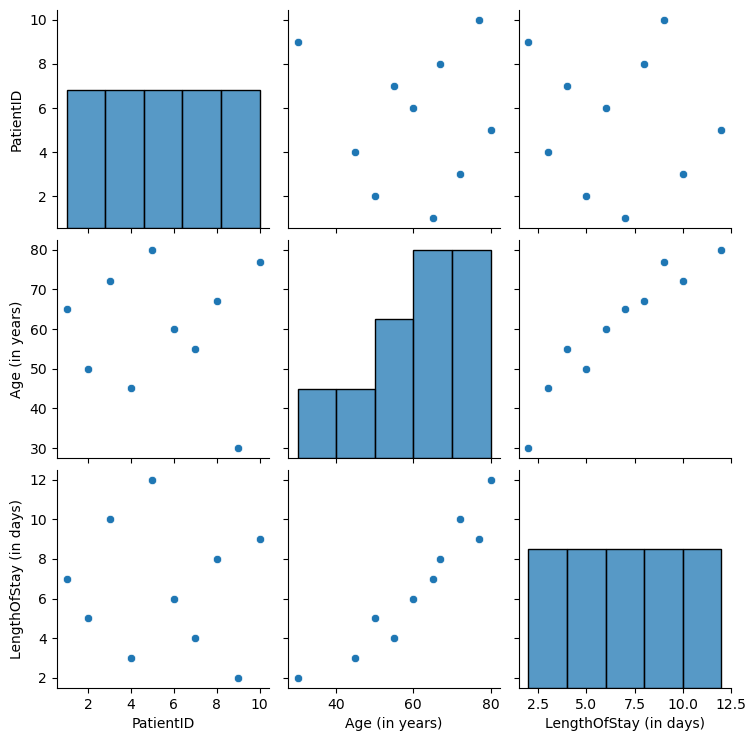

In [20]:
# 2. Pairplot
sns.pairplot(df2)
plt.show()

In [21]:
# 3. Linear Regression Example (Age and LengthOfStay)
X = df2[['Age (in years)']].values
y = df2['LengthOfStay (in days)'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([ 7.55959943,  4.62205016,  8.93045575,  3.64286708, 10.49714869,
        6.58041634,  5.60123325,  7.95127266,  0.70531782,  9.90963883])

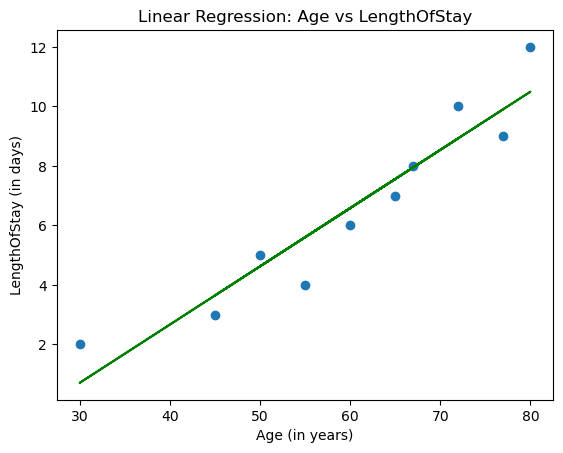

In [22]:
# Scatter plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='green')
plt.xlabel('Age (in years)')
plt.ylabel('LengthOfStay (in days)')
plt.title('Linear Regression: Age vs LengthOfStay')
plt.show()

In [23]:
# R-squared value
r_squared = model.score(X, y)
print(f"R-squared value for Age and LengthOfStay: {r_squared}")

R-squared value for Age and LengthOfStay: 0.8952531079657975


In [24]:
# Use chi-square tests for independence between categorical variables and readmission status.

In [25]:
# Using function

In [26]:
# Function to perform a chi-square test
def chi_square_test(df, column, target):
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {column} vs {target}')
    print(f'Chi-Square Statistic: {chi2}')
    print(f'P-value: {p}')
    print(f'Degrees of Freedom: {dof}')
    print(f'Expected Frequencies: \n{ex}')
# perform chi-square test for each categorical variable against readmission status
categorical_columns = ['Age (in years)', 'Gender']
for column in categorical_columns:
    chi_square_test(df, column, 'Readmitted')

Chi-Square Test for Age (in years) vs Readmitted
Chi-Square Statistic: 10.0
P-value: 0.3504852123233613
Degrees of Freedom: 9
Expected Frequencies: 
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
Chi-Square Test for Gender vs Readmitted
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies: 
[[2.5 2.5]
 [2.5 2.5]]


In [27]:
# Without function

In [28]:
# List of categorical columns
categorical_columns = ['Age (in years)', 'Gender', 'Readmitted']  # Example, update based on your dataset

# Perform chi-square test for each pair of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        column1 = categorical_columns[i]
        column2 = categorical_columns[j]
        contingency_table = pd.crosstab(df[column1], df[column2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f'Chi-Square Test for {column1} vs {column2}')
        print(f'Chi-Square Statistic: {chi2}')
        print(f'P-value: {p}')
        print(f'Degrees of Freedom: {dof}')
        print(f'Expected Frequencies: \n{ex}\n')

Chi-Square Test for Age (in years) vs Gender
Chi-Square Statistic: 10.0
P-value: 0.3504852123233613
Degrees of Freedom: 9
Expected Frequencies: 
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]

Chi-Square Test for Age (in years) vs Readmitted
Chi-Square Statistic: 10.0
P-value: 0.3504852123233613
Degrees of Freedom: 9
Expected Frequencies: 
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]

Chi-Square Test for Gender vs Readmitted
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies: 
[[2.5 2.5]
 [2.5 2.5]]



# Feature Analysis

In [29]:
# Analyze the impact of each on the readmission rate

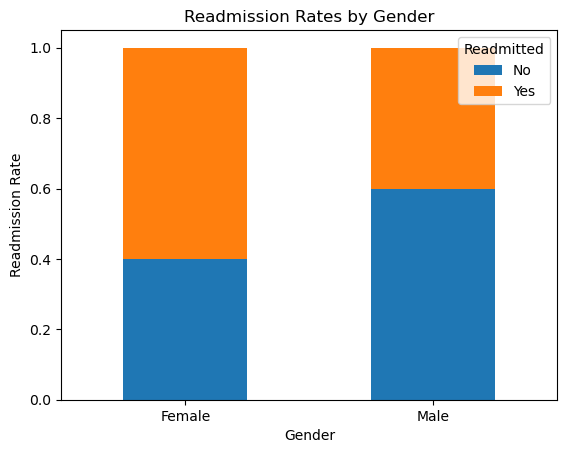

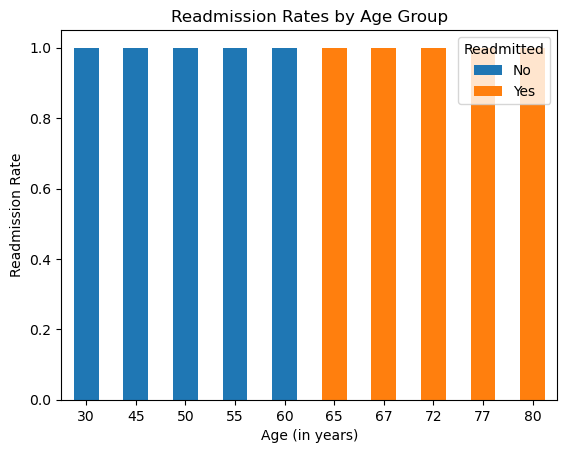

In [30]:
# Calculate readmission rates by Gender
readmission_rates_gender = df.groupby('Gender')['Readmitted'].value_counts(normalize=True).unstack()

# Plotting the readmission rates
readmission_rates_gender.plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Calculate readmission rates by AgeGroup (assuming AgeGroup is categorical)
readmission_rates_age = df.groupby('Age (in years)')['Readmitted'].value_counts(normalize=True).unstack()

# Plotting the readmission rates
readmission_rates_age.plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age (in years)')
plt.ylabel('Readmission Rate')
plt.legend(title='Readmitted', loc='upper right')
plt.xticks(rotation=0)
plt.show()

In [31]:
# Group data by Diagnosis and calculate the readmission rate for each diagnosis.

Readmission Rates by Diagnosis:
Readmitted         No  Yes
Diagnosis                 
Appendicitis      1.0  NaN
COPD              NaN  1.0
Diabetes          1.0  NaN
Fracture          NaN  1.0
Heart Failure     NaN  1.0
Hip Replacement   1.0  NaN
Knee Replacement  1.0  NaN
Pneumonia         NaN  1.0
Stroke            NaN  1.0
Tonsillectomy     1.0  NaN


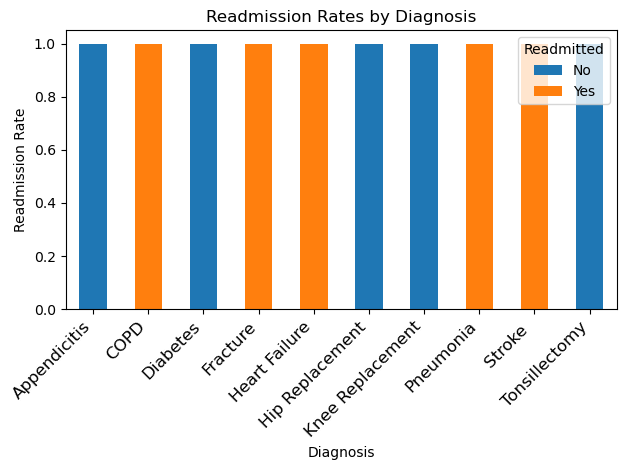

In [32]:
# Calculate readmission rates by Diagnosis
readmission_rates_diagnosis = df.groupby('Diagnosis')['Readmitted'].value_counts(normalize=True).unstack()

# Print or display the readmission rates
print("Readmission Rates by Diagnosis:")
print(readmission_rates_diagnosis)

# Plotting the readmission rates
ax = readmission_rates_diagnosis.plot(kind='bar', stacked=True)
plt.title('Readmission Rates by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Readmission Rate')
plt.legend(title='Readmitted', loc='upper right')

# Adjust the spacing of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()

In [33]:
# c. Compare the average LengthOfStay for patients who were readmitted versus those who were not.

Average Length of Stay for each readmission status:
Readmitted
No     4.0
Yes    9.2
Name: LengthOfStay (in days), dtype: float64


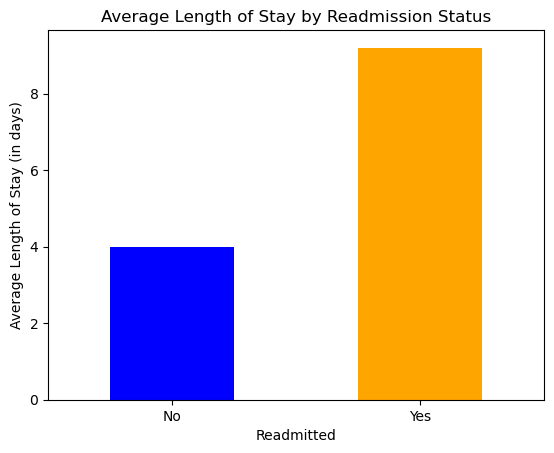

In [34]:
# Calculate the average LengthOfStay for each readmission status
average_los = df.groupby('Readmitted')['LengthOfStay (in days)'].mean()

# Print the results
print("Average Length of Stay for each readmission status:")
print(average_los)

# Plotting the results
average_los.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Length of Stay by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Average Length of Stay (in days)')
plt.xticks(rotation=0)
plt.show()

In [1]:
pip install pdfkit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pdfkit

path_to_html = "C:/Users/rupali rakibe/Downloads/Data_Analysis.html"
path_to_pdf = "output.pdf"
pdfkit.from_file(path_to_html, path_to_pdf)

OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf